In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [3]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\car_price_prediction.csv")
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [6]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.drop("Doors",axis=1,inplace=True)

In [9]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [10]:
data.shape

(18924, 17)

In [11]:
data=data.replace("-",np.nan)

In [12]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [13]:
data["Levy"]=pd.to_numeric(data["Levy"])

In [14]:
data["Levy"]=data["Levy"].fillna(int(data["Levy"].mean()))

In [15]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,906.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


In [16]:
data["Mileage"]=data["Mileage"].str.replace("km","",regex=False)

In [17]:
data["Mileage"]=pd.to_numeric(data["Mileage"],errors="coerce")

In [18]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,Left wheel,Black,8
2,45774419,8467,906.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4


In [19]:
data["Mileage"].dtype

dtype('int64')

<Axes: xlabel='count', ylabel='Manufacturer'>

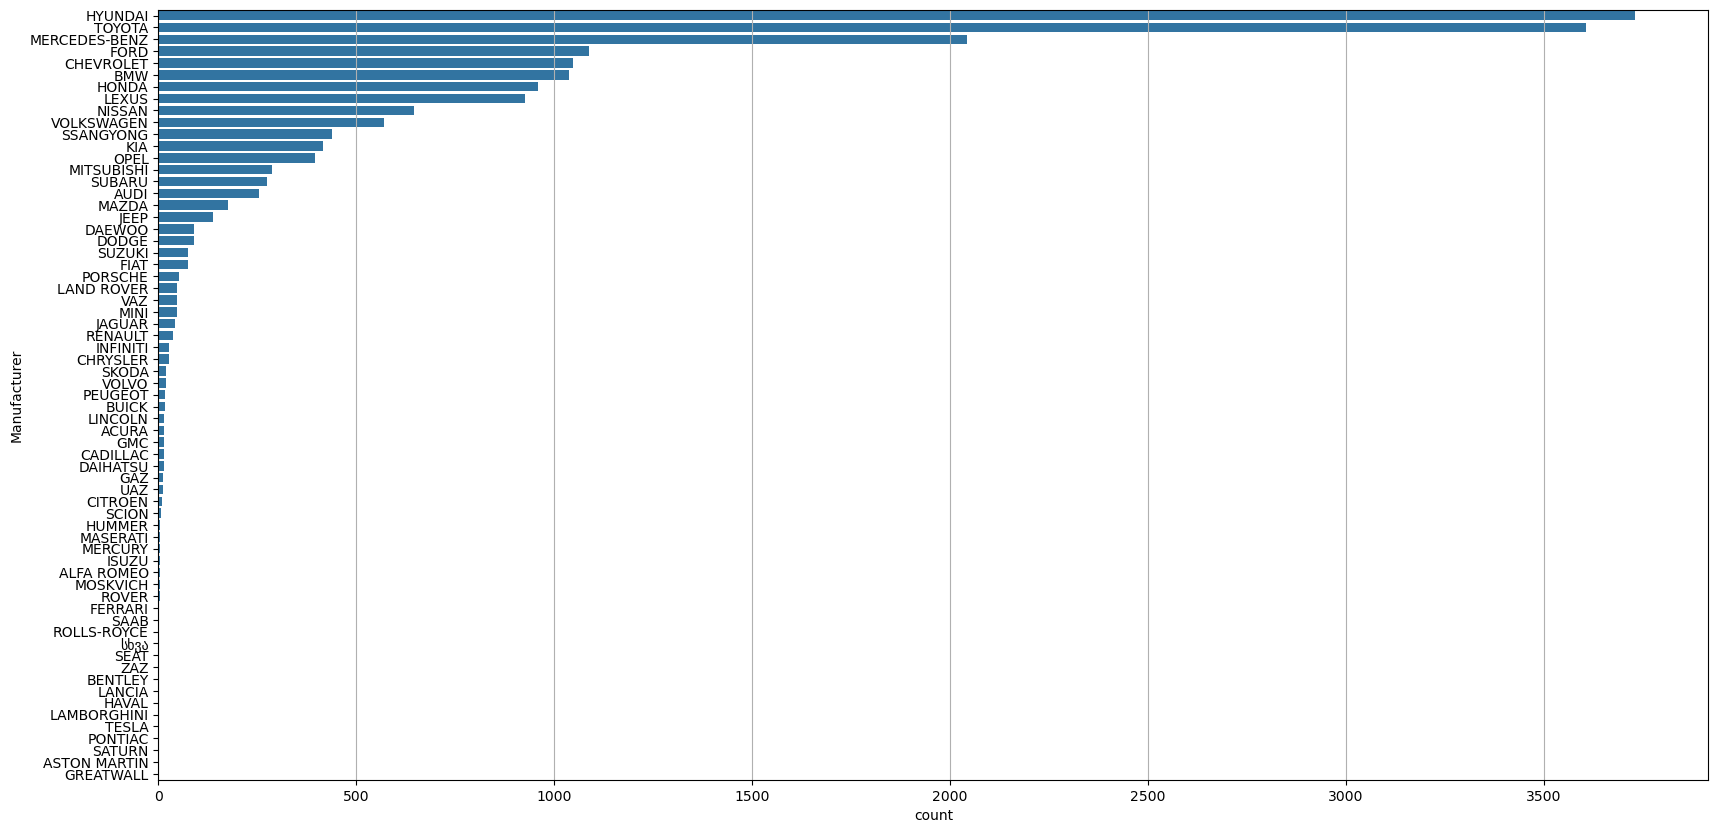

In [20]:
 plt.figure(figsize=(20,10))
plt.grid()
sns.barplot(data.Manufacturer.value_counts(),orient="y")

In [21]:
rare=data.Manufacturer.value_counts()
rare_category=list(dict(rare[rare<50]).keys())

In [22]:
data.Manufacturer=data.Manufacturer.map(lambda x:"other" if x in rare_category else x)


In [23]:
data.Manufacturer.value_counts()

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
other             506
SSANGYONG         439
KIA               417
OPEL              396
MITSUBISHI        288
SUBARU            274
AUDI              254
MAZDA             175
JEEP              138
DAEWOO             91
DODGE              90
FIAT               76
SUZUKI             76
PORSCHE            52
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Manufacturer'>

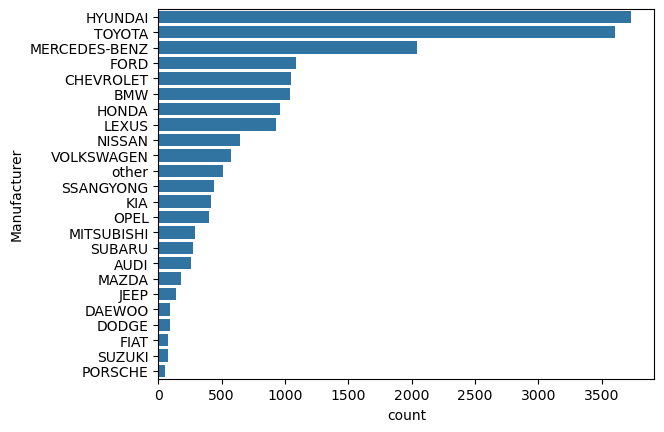

In [24]:
sns.barplot(data.Manufacturer.value_counts(),orient="y")

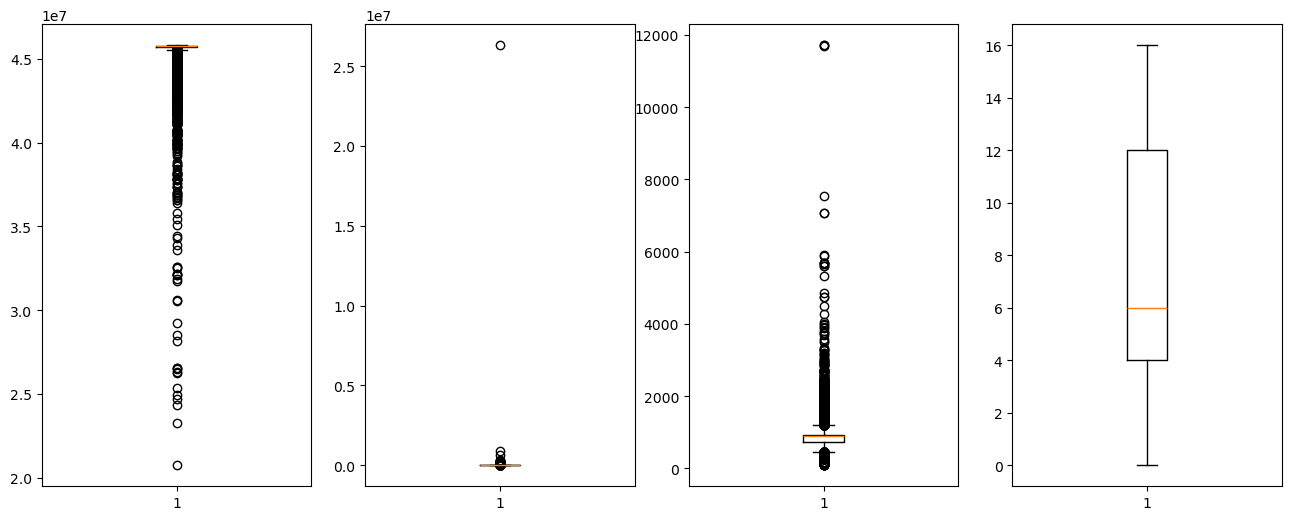

In [25]:
fig,axs=plt.subplots(1,4,figsize=(16,6))
axs[0].boxplot(data.ID)
axs[1].boxplot(data.Price)
axs[2].boxplot(data.Levy)
axs[3].boxplot(data.Airbags)
plt.show()

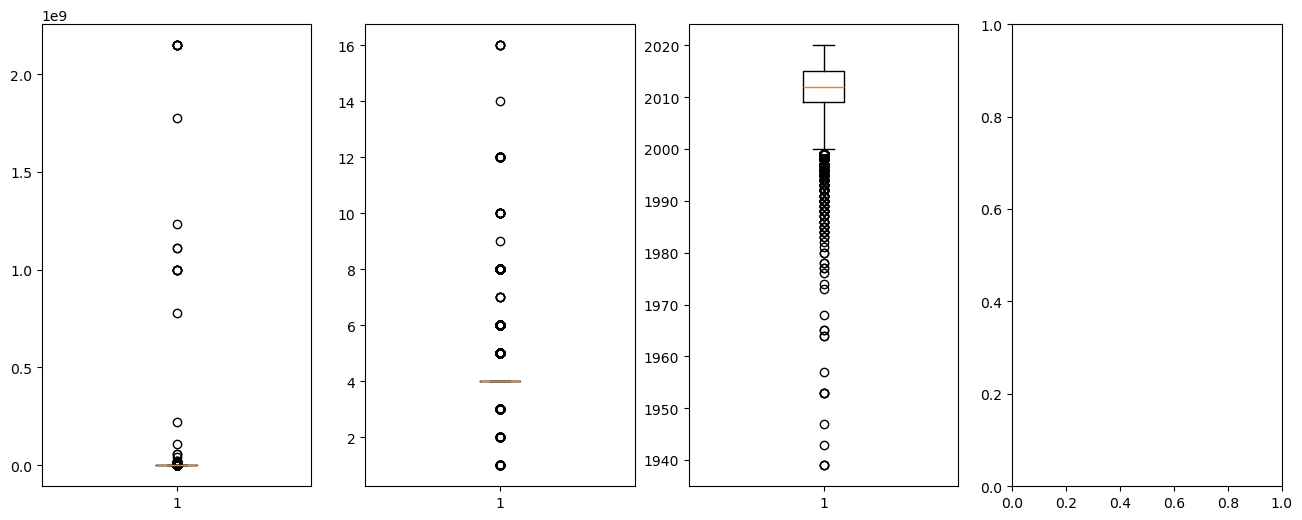

In [28]:
fig,axs=plt.subplots(1,4,figsize=(16,6))
axs[0].boxplot(data.Mileage)
axs[1].boxplot(data.Cylinders)
axs[2].boxplot(data['Prod. year'])
plt.show()

In [29]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Price'] >= Q1 - 1.5*IQR) &
        (data['Price'] <= Q3 + 1.5*IQR)]

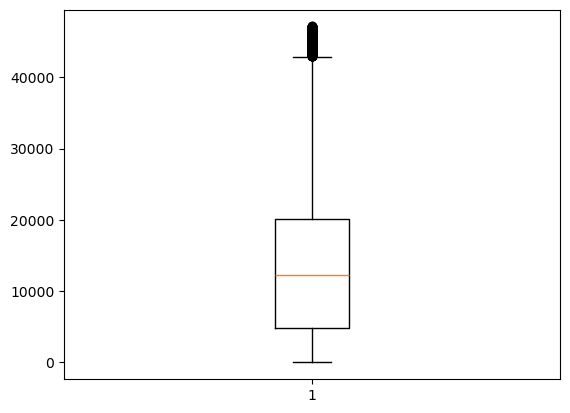

In [30]:
plt.boxplot(data.Price)
plt.show()

In [32]:
Q1 = data['ID'].quantile(0.25)
Q3 = data['ID'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['ID'] >= Q1 - 1.5*IQR) &
        (data['ID'] <= Q3 + 1.5*IQR)]

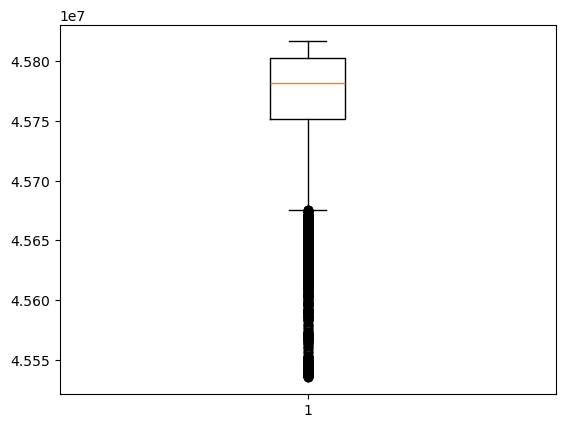

In [33]:
plt.boxplot(data.ID)
plt.show()

In [34]:
Q1 = data['Levy'].quantile(0.25)
Q3 = data['Levy'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Levy'] >= Q1 - 1.5*IQR) &
        (data['Levy'] <= Q3 + 1.5*IQR)]

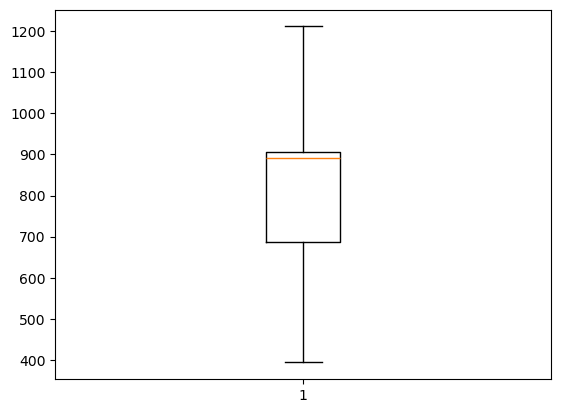

In [35]:
plt.boxplot(data.Levy)
plt.show()

In [36]:
Q1 = data['Mileage'].quantile(0.25)
Q3 = data['Mileage'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Mileage'] >= Q1 - 1.5*IQR) &
        (data['Mileage'] <= Q3 + 1.5*IQR)]

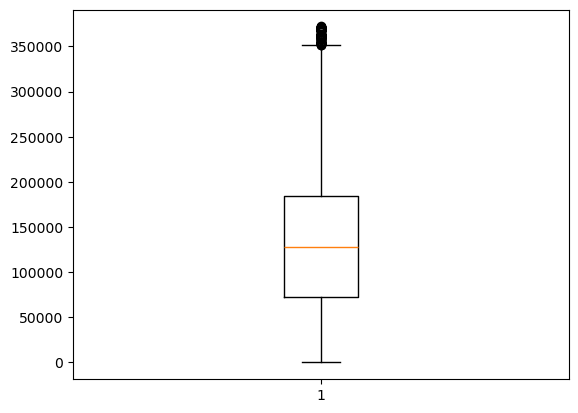

In [37]:
plt.boxplot(data.Mileage)
plt.show()

In [38]:
Q1 = data['Cylinders'].quantile(0.25)
Q3 = data['Cylinders'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Cylinders'] >= Q1 - 1.5*IQR) &
        (data['Cylinders'] <= Q3 + 1.5*IQR)]

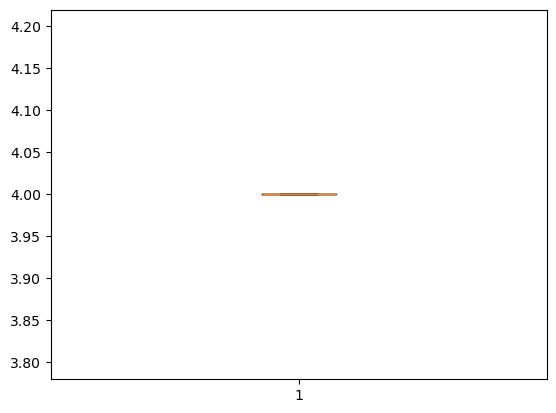

In [39]:
plt.boxplot(data.Cylinders)
plt.show()

In [40]:
Q1 = data['Prod. year'].quantile(0.25)
Q3 = data['Prod. year'].quantile(0.75)
IQR = Q3 - Q1

data = data[(data['Prod. year'] >= Q1 - 1.5*IQR) &
        (data['Prod. year'] <= Q3 + 1.5*IQR)]

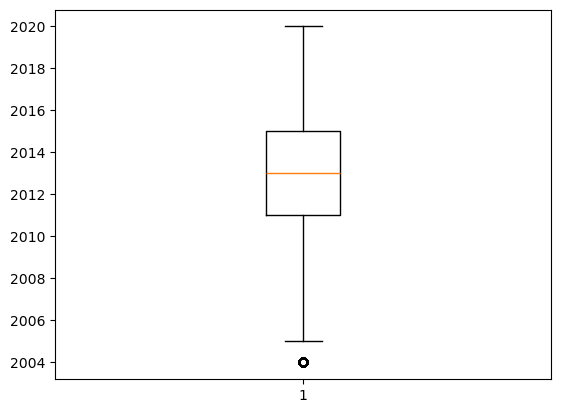

In [42]:
plt.boxplot(data['Prod. year'])
plt.show()